# Model Evaluation
## Scoring Metrics, Confusion Matrix, and Dealing with Imbalanced Classes

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=21,
                                                    stratify=y,
                                                    test_size=0.2)


In [4]:
X_train.shape

(1437, 64)

In [5]:
X_test.shape

(360, 64)

In [6]:
classifier = LinearSVC(random_state=1).fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

print("Accuracy: {}".format(classifier.score(X_test, y_test)))

Accuracy: 0.9361111111111111


In [7]:
y_test

array([6, 6, 2, 5, 4, 1, 2, 4, 5, 3, 3, 9, 4, 2, 9, 1, 8, 6, 8, 6, 0, 5,
       4, 8, 3, 0, 0, 3, 1, 2, 0, 8, 1, 6, 8, 0, 2, 4, 4, 2, 1, 6, 8, 5,
       7, 8, 9, 1, 2, 9, 3, 1, 0, 8, 4, 8, 3, 8, 7, 9, 9, 5, 9, 2, 7, 6,
       2, 1, 0, 0, 1, 6, 5, 7, 2, 8, 2, 9, 1, 1, 6, 2, 1, 1, 7, 3, 4, 2,
       3, 2, 4, 7, 3, 1, 0, 5, 9, 3, 7, 4, 7, 3, 4, 6, 9, 1, 4, 0, 3, 4,
       0, 7, 8, 1, 5, 5, 0, 0, 9, 5, 4, 8, 9, 6, 0, 8, 7, 7, 3, 6, 4, 5,
       7, 3, 9, 7, 6, 1, 0, 7, 5, 5, 9, 5, 7, 7, 1, 7, 4, 7, 2, 6, 2, 8,
       4, 2, 8, 8, 9, 5, 7, 9, 5, 5, 1, 0, 4, 5, 2, 2, 0, 3, 3, 7, 8, 0,
       7, 7, 3, 1, 1, 7, 0, 6, 6, 2, 9, 5, 3, 6, 3, 3, 4, 8, 1, 5, 0, 1,
       9, 0, 3, 2, 1, 5, 2, 5, 1, 1, 7, 8, 5, 6, 0, 2, 9, 7, 5, 7, 8, 7,
       3, 6, 1, 4, 5, 4, 6, 2, 5, 9, 5, 4, 0, 3, 4, 9, 9, 9, 9, 3, 3, 0,
       0, 9, 8, 7, 5, 2, 0, 0, 5, 8, 4, 0, 9, 2, 4, 3, 9, 2, 0, 8, 1, 4,
       4, 7, 0, 9, 3, 3, 6, 2, 5, 4, 5, 4, 1, 8, 3, 9, 1, 3, 1, 5, 6, 8,
       6, 8, 8, 2, 6, 5, 7, 6, 2, 8, 8, 4, 9, 1, 6,

In [8]:
y_test_pred

array([6, 6, 2, 5, 4, 1, 2, 4, 5, 3, 3, 9, 4, 2, 9, 1, 8, 6, 8, 6, 0, 5,
       4, 8, 7, 0, 0, 3, 1, 2, 0, 1, 1, 6, 8, 0, 2, 4, 4, 2, 1, 6, 8, 5,
       7, 8, 9, 1, 2, 9, 3, 1, 0, 8, 4, 8, 3, 8, 7, 9, 9, 5, 9, 2, 7, 6,
       2, 1, 0, 0, 9, 1, 5, 7, 2, 8, 2, 9, 1, 1, 6, 2, 1, 1, 7, 3, 4, 2,
       3, 2, 4, 7, 3, 1, 0, 5, 9, 3, 7, 4, 7, 3, 4, 6, 9, 1, 4, 0, 3, 4,
       0, 9, 8, 1, 5, 5, 0, 0, 9, 5, 4, 8, 9, 6, 0, 8, 7, 7, 3, 6, 4, 5,
       7, 3, 9, 7, 6, 1, 0, 7, 8, 5, 8, 5, 7, 5, 1, 7, 4, 7, 2, 6, 1, 8,
       1, 2, 8, 1, 7, 5, 7, 9, 5, 7, 1, 0, 4, 5, 2, 2, 0, 3, 3, 7, 8, 0,
       7, 7, 3, 1, 1, 7, 0, 6, 6, 2, 9, 5, 3, 6, 3, 3, 4, 8, 1, 5, 0, 3,
       9, 0, 3, 2, 1, 5, 2, 5, 1, 1, 7, 8, 5, 6, 5, 2, 9, 7, 5, 7, 8, 7,
       3, 6, 1, 4, 5, 4, 6, 2, 5, 9, 5, 4, 0, 3, 4, 9, 9, 9, 9, 3, 8, 0,
       0, 9, 8, 7, 5, 2, 0, 0, 5, 8, 4, 0, 9, 2, 4, 3, 9, 2, 0, 1, 1, 4,
       4, 7, 0, 9, 3, 3, 6, 2, 5, 4, 5, 4, 1, 5, 3, 9, 1, 3, 1, 5, 6, 8,
       6, 8, 8, 2, 6, 5, 7, 6, 2, 8, 8, 4, 9, 1, 6,

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)
# rows : gt
# columns : predictions

array([[35,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 34,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  0,  0, 34,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  1,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 33,  0,  1],
       [ 0,  4,  0,  0,  0,  1,  0,  0, 30,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  2, 32]], dtype=int64)

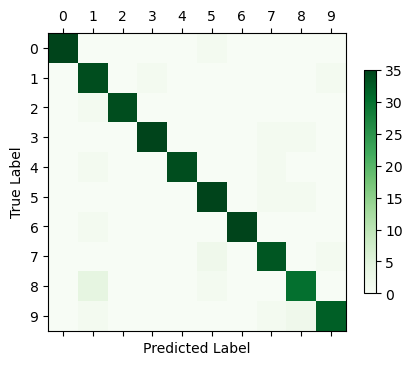

In [10]:
plt.matshow(confusion_matrix(y_test, y_test_pred), cmap="Greens")
plt.colorbar(shrink=0.6)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

<img src="imgs/conf-matrix.png" width="90%">
<img src="imgs/type-errors.jpg" width="70%">

[Source](https://towardsdatascience.com/baffling-concept-of-true-positive-and-true-negative-bffbc340f107)

<img src="imgs/conf2.png" width="100%">
<img src="imgs/conf3.png" width="100%">

Another useful function is the ``classification_report`` which provides precision, recall, f-score and support for all classes.
These metrics are helpful especially in the face of ``Imbalanced Data``


TP: True Positive </br>
FP: False Positive</br>
TN: True Negative</br>
FN: False Negative</br>

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 = 2 x (precision x recall) / (precision + recall)


The values of all these values above are in the closed interval [0, 1], where 1 means a perfect score.

<img src="imgs/precision-recall.png" width="90%">

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.81      0.94      0.87        36
           2       1.00      0.97      0.99        35
           3       0.97      0.95      0.96        37
           4       1.00      0.94      0.97        36
           5       0.90      0.95      0.92        37
           6       1.00      0.97      0.99        36
           7       0.89      0.92      0.90        36
           8       0.88      0.86      0.87        35
           9       0.94      0.89      0.91        36

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [12]:
np.bincount(y) / y.shape[0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [13]:
X, y = digits.data, digits.target == 5

In [18]:
# classes:  0: 0,1,2,3,4,6,7,8,9 
#           1: 5

In [17]:
np.bincount(y) / y.shape[0]

array([0.9, 0.1])

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

cross_val_score(SVC(), X, y)

array([0.99, 0.99, 0.99, 1.  , 0.99])

In [28]:
from sklearn.dummy import DummyClassifier
cross_val_score(DummyClassifier(strategy="most_frequent"), X, y)

array([0.9, 0.9, 0.9, 0.9, 0.9])